<a href="https://colab.research.google.com/github/micah-shull/pipelines/blob/main/pipelines_16_ensemble_045_imbalanced_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
print(sklearn.__version__)

1.3.2


### Load & Preprocess

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import warnings
from loan_data_utils import load_and_preprocess_data, plot_class_distribution, plot_mean_class_metrics

# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define your URL, categorical columns, and target
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
categorical_columns = ['sex', 'education', 'marriage']
target = 'default_payment_next_month'

# Load and preprocess data
X, y = load_and_preprocess_data(url, categorical_columns, target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['category']).columns.tolist()

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(drop='first'))
        ]), categorical_features)
    ])




### Problem of Class Imbalance

**Class imbalance** occurs when one class in a dataset significantly outnumbers the other classes. This is common in many real-world scenarios, such as fraud detection, medical diagnoses, and loan defaults. In such cases, the majority class (the more frequent class) dominates the dataset, while the minority class (the less frequent class) is underrepresented.

### Impact on Model Performance

When training a machine learning model on imbalanced data, the model tends to become biased towards the majority class. This bias can lead to the following issues:

1. **High Accuracy but Poor Minority Class Performance**: The model may achieve high overall accuracy by simply predicting the majority class most of the time. However, it will likely perform poorly on the minority class, failing to identify critical instances.

2. **High Precision and Recall for the Majority Class**: Precision and recall scores for the majority class may be high because the model is good at predicting the majority class correctly. However, this often comes at the expense of poor performance for the minority class.

3. **Low Precision and Recall for the Minority Class**: Precision and recall scores for the minority class are typically low because the model struggles to correctly identify minority class instances. This is problematic in scenarios where identifying the minority class correctly is crucial (e.g., detecting fraudulent transactions or diagnosing diseases).

### Checking for Class Imbalance Issues

To check for the impact of class imbalance on model performance, you can:

1. **Analyze Class Distribution**: Examine the distribution of classes in your dataset. If there is a significant imbalance, it indicates a potential issue.

2. **Evaluate Precision and Recall Scores**: Assess precision and recall scores for both the majority and minority classes. High precision and recall for the majority class and low scores for the minority class suggest that the model is biased towards the majority class.

3. **Confusion Matrix**: A confusion matrix provides a detailed breakdown of true positives, false positives, true negatives, and false negatives for each class. This helps in understanding how well the model performs on each class.

4. **F1 Score**: The F1 score, which is the harmonic mean of precision and recall, can be calculated for both classes. A low F1 score for the minority class indicates poor performance.

### Addressing Class Imbalance

To address class imbalance and improve model performance on the minority class, you can:

1. **Resampling Techniques**: Use techniques like oversampling (e.g., SMOTE) to increase the number of minority class instances, or undersampling to reduce the number of majority class instances.

2. **Class Weight Adjustment**: Adjust class weights in your model to give more importance to the minority class. This helps the model focus on learning to identify minority class instances better.

3. **Ensemble Methods**: Use ensemble methods like bagging and boosting, which can help improve the performance of models on imbalanced data.

4. **Threshold Tuning**: Adjust the decision threshold to balance precision and recall for the minority class.

By implementing these techniques, you can create more balanced models that perform well on both the majority and minority classes, leading to more reliable and accurate predictions.

### Class Distribution Plot

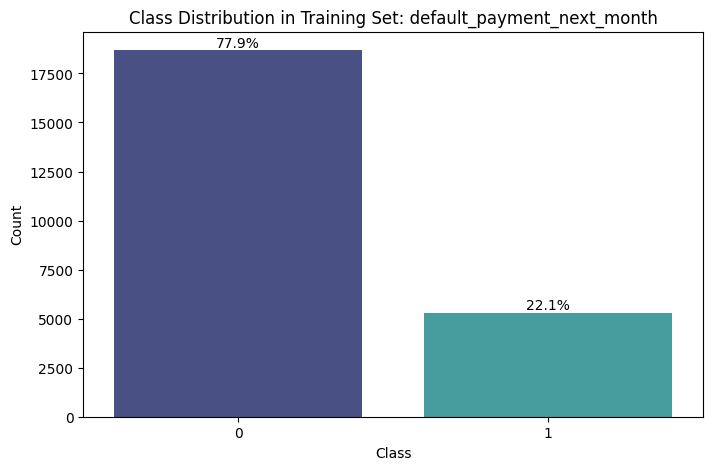

In [45]:
plot_class_distribution(y_train, target)

### Model Performance Plot

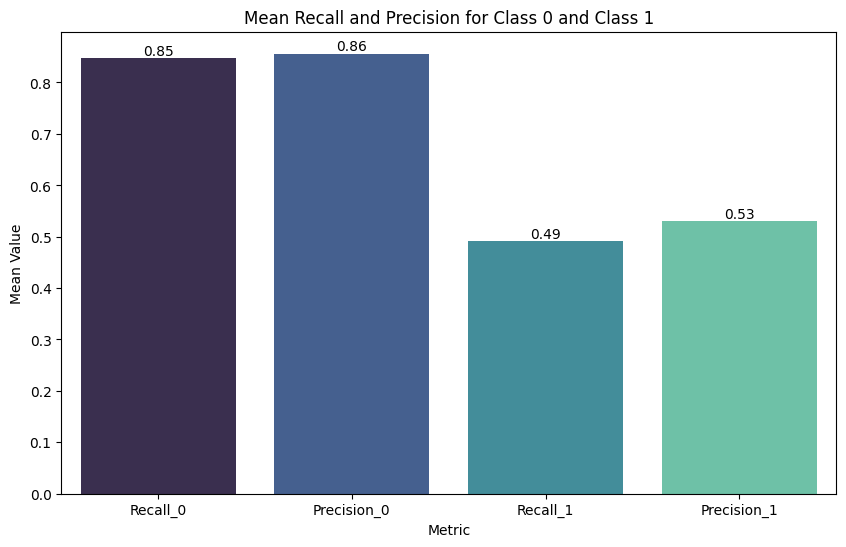

In [47]:
# Load the CSV file into a DataFrame
file_path = '/content/combined_model_metrics_with_resampling.csv'
df = pd.read_csv(file_path)
plot_mean_metrics(metrics_df)


### Top Models

In [68]:
from loan_data_utils import get_top_performers, select_and_sort_top_n

# Load the CSV file into a DataFrame
file_path = '/content/combined_model_metrics_with_resampling.csv'
data = pd.read_csv(file_path)

columns_to_check = ['Recall_0', 'Precision_0']
# columns_to_check = ['Recall_0', 'Precision_0', 'F1_0', 'Recall_1',
#                     'Precision_1', 'F1_1', 'F1_Macro', 'Accuracy']
top3_combined_df = select_and_sort_top_n(df, columns_to_check, n=3)
top3_combined_df

,Model,Experiment,Recall_0,Precision_0,F1_0,Recall_1,Precision_1,F1_1,F1_Macro,Accuracy
0,Logistic Regression,baseline,0.969399,0.818724,0.887713,0.244160,0.693790,0.361204,0.624459,0.809000
1,LGBM,baseline,0.947143,0.840486,0.890633,0.366993,0.663488,0.472586,0.681609,0.818833
2,Random Forest,class_weight_balanced,0.947143,0.835094,0.887597,0.341372,0.647143,0.446966,0.667281,0.813167
3,LGBM (RandomUnderSampler),resampling,0.770383,0.882786,0.822763,0.639789,0.441727,0.522622,0.672693,0.741500
4,HistGradientBoosting (RandomUnderSampler),resampling,0.786433,0.881929,0.831448,0.629239,0.455537,0.528481,0.679964,0.751667
5,Random Forest (RandomUnderSampler),resampling,0.775947,0.880738,0.825028,0.629992,0.443972,0.520872,0.672950,0.743667


In [76]:
# Load the CSV file into a DataFrame
file_path = '/content/combined_model_metrics_with_resampling.csv'
metrics_df = pd.read_csv(file_path)

rc0 = get_top_performers(metrics_df, top_n=3)
print(rc0[rc0['Metric'] == 'Recall_0']['Model'].values())

pc0 = get_top_performers(metrics_df, top_n=3)
print(pc0[pc0['Metric'] == 'Precision_0']['Model'].values)

['Logistic Regression' 'LGBM' 'Random Forest']
['LGBM (RandomUnderSampler)' 'HistGradientBoosting (RandomUnderSampler)'
 'Random Forest (RandomUnderSampler)']


### Logistic Regression Tuning

In [93]:
np.logspace(-3, 3, 5)

array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03])

In [94]:
import json
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from loan_data_utils import evaluate_model, clean_params

# Define the hyperparameter grid for Logistic Regression
param_grid_lr = {
    'classifier__C': np.logspace(-3, 1, 5),
    'classifier__solver': ['liblinear', 'lbfgs']
}

# Logistic Regression pipeline
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, class_weight='balanced', max_iter=3000))
])

# Setup GridSearchCV
grid_lr = GridSearchCV(pipeline_lr, param_grid=param_grid_lr, scoring='recall', cv=5)

# Fit the model
grid_lr.fit(X_train, y_train)

# Get the best model and its parameters
best_params_lr = grid_lr.best_params_
best_params_lr_clean = clean_params(best_params_lr)
print("Best Logistic Regression Parameters:", best_params_lr_clean)

# Evaluate the best model
evaluation_results_lr = evaluate_model(grid_lr.best_estimator_, X_train, X_test, y_train, y_test, 'Logistic Regression', 'Class 0 Recall')
print("\nLogistic Regression - Best Model Evaluation:")
print(evaluation_results_lr)

# Load existing parameters
with open('/content/top_model_params.json', 'r') as f:
    top_model_params = json.load(f)

# Ensure "Class 0 Recall" key exists
if "Class 0 Recall" not in top_model_params:
    top_model_params["Class 0 Recall"] = {}

# Update the top models and parameters with the new tuning results
top_model_params["Class 0 Recall"]["Logistic Regression (baseline)"] = {
    "best_params": best_params_lr_clean
}

# Save the updated top model parameters to the JSON file
with open('/content/top_model_params.json', 'w') as f:
    json.dump(top_model_params, f, indent=4)


Best Logistic Regression Parameters: {'C': 0.01, 'solver': 'liblinear'}

Logistic Regression - Best Model Evaluation:
{'Model': 'Logistic Regression', 'Experiment': 'Class 0 Recall', 'Recall_0': 0.6959126899208218, 'Precision_0': 0.8685897435897436, 'F1_0': 0.7727218724010931, 'Recall_1': 0.6292388847023361, 'Precision_1': 0.3701241134751773, 'F1_1': 0.466089868825007, 'F1_Macro': 0.6194058706130501, 'Accuracy': 0.6811666666666667}


#### LogReg Tuning Plot

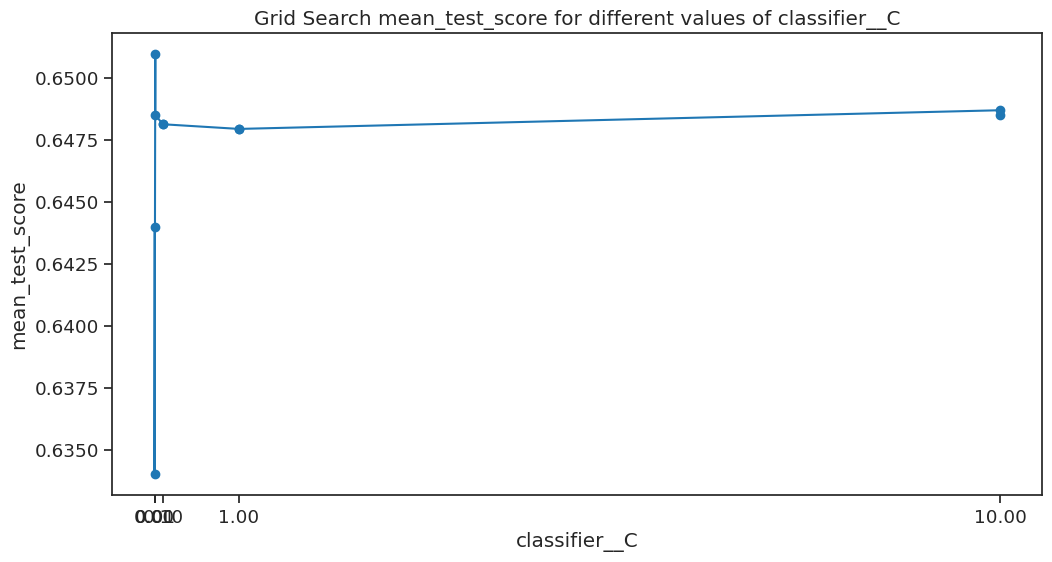

In [95]:
# Extract the results from GridSearchCV
results = grid_lr.cv_results_

# Create a DataFrame with the results
results_df = pd.DataFrame(results)

# Function to plot line charts of grid search results
def plot_simple_line_chart_grid_search(results_df, param, score='mean_test_score'):
    plt.figure(figsize=(12, 6))
    sns.set_context("notebook", font_scale=1.2)
    sns.set_style("ticks")

    # Extract the values of the specified parameter
    unique_params = results_df[f'param_{param}'].unique()

    # Ensure that the parameter values are numeric
    unique_params = np.array(unique_params, dtype=float)

    # Plot the results
    plt.plot(results_df[f'param_{param}'].astype(float), results_df[score], marker='o')

    plt.title(f'Grid Search {score} for different values of {param}')
    plt.xlabel(param)
    plt.ylabel(score)
    plt.xticks(unique_params, labels=[f'{param:.2f}' for param in unique_params])  # Format x-ticks to 2 decimals
    plt.show()

# Example usage
plot_simple_line_chart_grid_search(results_df, 'classifier__C', score='mean_test_score')

### LGBM Tuning

In [86]:
from lightgbm import LGBMClassifier

# Define the hyperparameter grid for LGBM
param_grid_lgbm = {
    'classifier__num_leaves': [31, 50, 100],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__n_estimators': [100, 200, 500]
}

# LGBM pipeline
pipeline_lgbm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42, class_weight='balanced', force_col_wise=True))
])

# Setup GridSearchCV
grid_lgbm = GridSearchCV(pipeline_lgbm, param_grid=param_grid_lgbm, scoring='recall', cv=5)

# Fit the model
grid_lgbm.fit(X_train, y_train)

# Get the best model and its parameters
best_params_lgbm = grid_lgbm.best_params_
best_params_lgbm_clean = clean_params(best_params_lgbm)
print("Best LGBM Parameters:", best_params_lgbm_clean)

# Evaluate the best model
evaluation_results_lgbm = evaluate_model(grid_lgbm.best_estimator_, X_train, X_test, y_train, y_test, 'LGBM', 'Class 0 Recall')
print("\nLGBM - Best Model Evaluation:")
print(evaluation_results_lgbm)

# Load existing parameters
with open('/content/top_model_params.json', 'r') as f:
    top_model_params = json.load(f)

# Ensure "Class 0 Recall" key exists
if "Class 0 Recall" not in top_model_params:
    top_model_params["Class 0 Recall"] = {}

# Update the top models and parameters with the new tuning results
top_model_params["Class 0 Recall"]["LGBM (baseline)"] = {
    "best_params": best_params_lgbm_clean
}

# Save the updated top model parameters to the JSON file
with open('/content/top_model_params.json', 'w') as f:
    json.dump(top_model_params, f, indent=4)


[LightGBM] [Info] Number of positive: 4248, number of negative: 14952
[LightGBM] [Info] Total Bins 3276
[LightGBM] [Info] Number of data points in the train set: 19200, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 4247, number of negative: 14953
[LightGBM] [Info] Total Bins 3269
[LightGBM] [Info] Number of data points in the train set: 19200, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 4247, number of negative: 14953
[LightGBM] [Info] Total Bins 3272
[LightGBM] [Info] Number of data points in the train set: 19200, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM

#### LGBM Tuning Plot

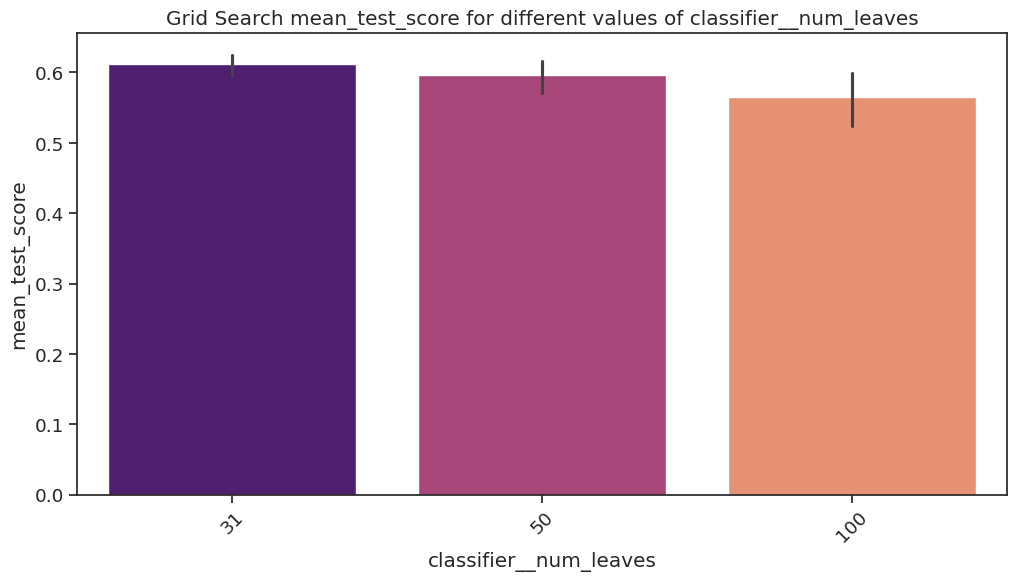

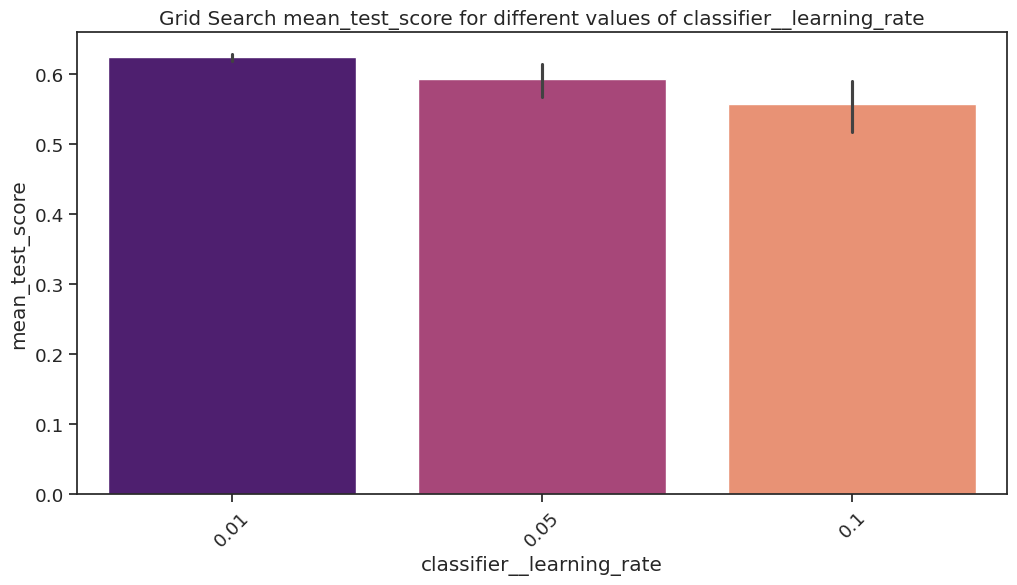

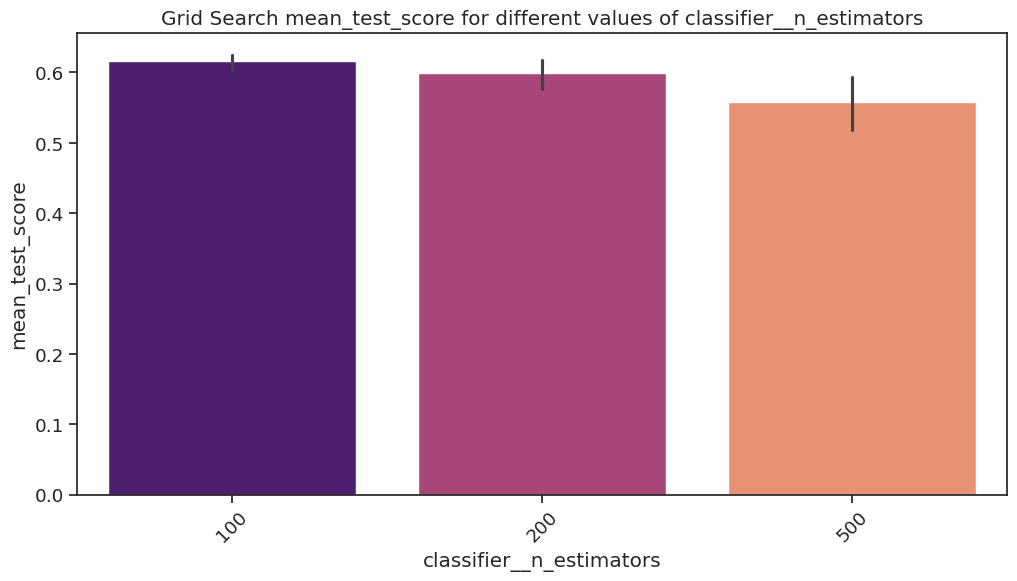

In [96]:
# Extract the results from GridSearchCV
results = grid_lgbm.cv_results_

# Create a DataFrame with the results
results_df = pd.DataFrame(results)

# Function to plot bar charts of grid search results
def plot_grid_search_results(results_df, param, score='mean_test_score'):
    plt.figure(figsize=(12, 6))
    sns.set_context("notebook", font_scale=1.2)
    sns.set_style("ticks")

    # Extract the values of the specified parameter
    param_values = results_df[f'param_{param}'].astype(str)

    # Plot the results
    sns.barplot(x=param_values, y=results_df[score], hue=param_values, palette='magma')

    plt.title(f'Grid Search {score} for different values of {param}')
    plt.xlabel(param)
    plt.ylabel(score)
    plt.xticks(rotation=45)
    plt.show()

# Example usage for LGBM parameters
plot_grid_search_results(results_df, 'classifier__num_leaves', score='mean_test_score')
plot_grid_search_results(results_df, 'classifier__learning_rate', score='mean_test_score')
plot_grid_search_results(results_df, 'classifier__n_estimators', score='mean_test_score')

### Random Forest Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 500],
    'classifier__max_depth': [10, 20, 30, None],
    'classifier__min_samples_split': [2, 10, 20],
    'classifier__min_samples_leaf': [1, 5, 10]
}

# Random Forest pipeline
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Setup GridSearchCV
grid_rf = GridSearchCV(pipeline_rf, param_grid=param_grid_rf, scoring='recall', cv=5)

# Fit the model
grid_rf.fit(X_train, y_train)

# Get the best model and its parameters
best_params_rf = grid_rf.best_params_
best_params_rf_clean = clean_params(best_params_rf)
print("Best Random Forest Parameters:", best_params_rf_clean)

# Evaluate the best model
evaluation_results_rf = evaluate_model(grid_rf.best_estimator_, X_train, X_test, y_train, y_test, 'Random Forest', 'Class 0 Recall')
print("\nRandom Forest - Best Model Evaluation:")
print(evaluation_results_rf)

# Load existing parameters
with open('/content/top_model_params.json', 'r') as f:
    top_model_params = json.load(f)

# Ensure "Class 0 Recall" key exists
if "Class 0 Recall" not in top_model_params:
    top_model_params["Class 0 Recall"] = {}

# Update the top models and parameters with the new tuning results
top_model_params["Class 0 Recall"]["Random Forest (class_weight_balanced)"] = {
    "best_params": best_params_rf_clean
}

# Save the updated top model parameters to the JSON file
with open('/content/top_model_params.json', 'w') as f:
    json.dump(top_model_params, f, indent=4)


#### Random Forest Tuning Plot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract the results from GridSearchCV
results = grid_lgbm.cv_results_

# Create a DataFrame with the results
results_df = pd.DataFrame(results)

# Function to plot bar charts of grid search results
def plot_grid_search_results(results_df, param, score='mean_test_score'):
    plt.figure(figsize=(12, 6))
    sns.set_context("notebook", font_scale=1.2)
    sns.set_style("ticks")

    # Extract the values of the specified parameter
    param_values = results_df[f'param_{param}'].astype(str)

    # Plot the results
    sns.barplot(x=param_values, y=results_df[score], hue=param_values, palette='magma')

    plt.title(f'Grid Search {score} for different values of {param}')
    plt.xlabel(param)
    plt.ylabel(score)
    plt.xticks(rotation=45)
    plt.show()

# Example usage for LGBM parameters
plot_grid_search_results(results_df, 'classifier__num_leaves', score='mean_test_score')
plot_grid_search_results(results_df, 'classifier__learning_rate', score='mean_test_score')
plot_grid_search_results(results_df, 'classifier__n_estimators', score='mean_test_score')


In [ ]:
# Load the saved parameters
with open('/content/top_model_params.json', 'r') as f:
    top_model_params = json.load(f)

# Loop through the parameters and print them
for category, models in top_model_params.items():
    print(f"Category: {category}")
    for model_name, params in models.items():
        print(f"  Model: {model_name}")
        print(f"    Best Params: {params['best_params']}")
        # print(f"    Threshold: {params['threshold']}")

### Write Data Utils Script

In [82]:
script_content=r'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import joblib
import json
import logging
# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

#--------   Load and Preprocess Data   --------#

def load_data_from_url(url):
    try:
        df = pd.read_excel(url, header=1)
        logging.info("Data loaded successfully from URL.")
    except Exception as e:
        logging.error(f"Error loading data from URL: {e}")
        return None
    return df

def clean_column_names(df):
    df.columns = [col.lower().replace(' ', '_') for col in df.columns]
    return df

def remove_id_column(df):
    if 'id' in df.columns:
        df = df.drop(columns=['id'])
    return df

def rename_columns(df):
    rename_dict = {'pay_0': 'pay_1'}
    df = df.rename(columns=rename_dict)
    return df

def convert_categorical(df, categorical_columns):
    df[categorical_columns] = df[categorical_columns].astype('category')
    return df

def split_features_target(df, target):
    X = df.drop(columns=[target])
    y = df[target]
    return X, y

def load_and_preprocess_data(url, categorical_columns, target):
    df = load_data_from_url(url)
    if df is not None:
        df = clean_column_names(df)
        df = remove_id_column(df)
        df = rename_columns(df)
        df = convert_categorical(df, categorical_columns)
        X, y = split_features_target(df, target)
        return X, y
    return None, None

#--------   Plot Class Distribution   --------#


def plot_class_distribution(y_train, target_name):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=y_train, hue=y_train, palette='mako')
    plt.title(f'Class Distribution in Training Set: {target_name}')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.legend([], [], frameon=False)

    # Calculate the percentage for each class
    total = len(y_train)
    class_counts = y_train.value_counts()
    for i, count in enumerate(class_counts):
        percentage = 100 * count / total
        plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

    plt.show()

def plot_mean_class_metrics(df):
    """
    Function to calculate and plot the mean recall and precision metrics for class 0 and class 1.
    """
    # Calculate the mean of recall and precision for both classes
    metrics_df = pd.DataFrame({
        'Metric': ['Recall_0', 'Precision_0', 'Recall_1', 'Precision_1'],
        'Mean Value': [
            df['Recall_0'].mean(),
            df['Precision_0'].mean(),
            df['Recall_1'].mean(),
            df['Precision_1'].mean()
        ]
    })

    # Plot the mean of recall and precision for each class
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Metric', y='Mean Value', data=metrics_df, palette='mako')
    plt.title('Mean Recall and Precision for Class 0 and Class 1')
    plt.xlabel('Metric')
    plt.ylabel('Mean Value')
    for index, row in metrics_df.iterrows():
        plt.text(index, row['Mean Value'], f'{row["Mean Value"]:.2f}', ha='center', va='bottom')
    plt.show()

#--------   Evaluate and Capture Metrics   --------#

def evaluate_model(pipeline, X_train, X_test, y_train, y_test, model_name, experiment_name):
    logger.info(f"Training and evaluating model: {model_name} ({experiment_name})")

    # Fit the pipeline
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Capture classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Extract relevant metrics
    metrics = {
        'Model': model_name,
        'Experiment': experiment_name,
        'Recall_0': report['0']['recall'],
        'Precision_0': report['0']['precision'],
        'F1_0': report['0']['f1-score'],
        'Recall_1': report['1']['recall'],
        'Precision_1': report['1']['precision'],
        'F1_1': report['1']['f1-score'],
        'F1_Macro': report['macro avg']['f1-score'],
        'Accuracy': report['accuracy']
    }

    logger.info(f"Completed evaluation for model: {model_name} ({experiment_name})")
    return metrics

def compile_metrics(metrics_list, experiment_name='experiment_name'):
    metrics_df = pd.DataFrame(metrics_list)
    csv_filename = f'{experiment_name}_metrics.csv'
    metrics_df.to_csv(csv_filename, index=False)
    logger.info(f"Metrics saved to {csv_filename}")
    return metrics_df


def clean_params(params):
    """
    Clean the model parameters by removing the 'classifier__' prefix.
    """
    return {key.replace('classifier__', ''): value for key, value in params.items()}

# --------   Get Top Performers   --------#

import pandas as pd
def get_top_performers(metrics_df, top_n=3):
    metrics = ['Recall_0', 'Precision_0', 'Recall_1', 'Precision_1']
    top_performers = []

    for metric in metrics:
        sorted_df = metrics_df[['Experiment', 'Model', metric]].sort_values(by=metric, ascending=False).head(top_n)
        sorted_df['Metric'] = metric
        sorted_df = sorted_df.rename(columns={metric: 'Value'})
        top_performers.append(sorted_df)

    # Concatenate all top performers into a single DataFrame
    top_performers_df = pd.concat(top_performers, ignore_index=True)

    # Save the results to a CSV file
    top_performers_df.to_csv('top_performing_models.csv', index=False)
    return top_performers_df

def select_and_sort_top_n(df, columns, n=3):
    """
    Selects the top n rows based on each specified column and returns a DataFrame with all columns.

    Args:
    df (pd.DataFrame): The input DataFrame.
    columns (list of str): The columns to sort by.
    n (int): The number of top rows to select for each column.

    Returns:
    pd.DataFrame: A DataFrame containing the top n rows for each specified column, without duplicates.
    """
    top_n_combined_df = pd.DataFrame()

    for column in columns:
        top_n = df.nlargest(n, column)
        top_n_combined_df = pd.concat([top_n_combined_df, top_n])

    # Drop duplicates and reset index
    top_n_combined_df = top_n_combined_df.drop_duplicates().reset_index(drop=True)

    return top_n_combined_df

'''

# Write the script to a file
with open("loan_data_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to loan_data_utils.py")
# Reload script to make functions available for use
import importlib
import loan_data_utils
importlib.reload(loan_data_utils)

from loan_data_utils import *

Script successfully written to loan_data_utils.py
